,N_est,lower,upper,decade,region_name,model_type,count_cps
1974,3.841805,2.717745,5.070680,450,Korea,base_model,1
1975,5.861934,4.066272,7.898157,580,Korea,base_model,1
1976,14.282373,9.742924,19.441832,640,Korea,base_model,2
1977,7.337083,4.984356,9.990941,650,Korea,base_model,1
1978,7.520134,5.083793,10.296327,660,Korea,base_model,1
...,...,...,...,...,...,...,...
2035,19.555991,13.933130,25.977754,1820,Korea,base_model,2
2036,10.231363,7.444412,13.414735,1830,Korea,base_model,1
2037,50.945332,36.988095,66.605435,1840,Korea,base_model,5
2038,20.303770,14.736468,26.552707,1850,Korea,base_model,2


Text(0.5, 1.0, 'Coverage by Region')

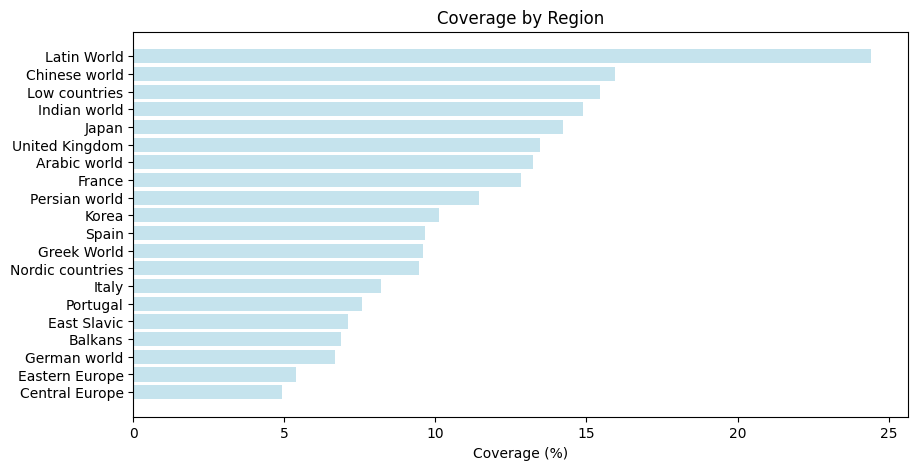

In [44]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)
data_sorted = data.sort_values(by='count_cps', ascending=False)
data_group = (data_sorted.groupby('region_name')['count_cps'].sum() / data_sorted.groupby('region_name')['N_est'].sum()).rename('coverage').reset_index()
data_group = data_group.sort_values('coverage', ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(data_group['region_name'],data_group['coverage']*100, color='lightblue', alpha=0.7)
ax.set_xlabel('Coverage (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

In [47]:
list(set(data['region_name']))

['Indian world',
 'Korea',
 'Japan',
 'Balkans',
 'Eastern Europe',
 'Persian world',
 'United Kingdom',
 'Italy',
 'Chinese world',
 'Nordic countries',
 'Portugal',
 'German world',
 'Low countries',
 'East Slavic',
 'Arabic world',
 'Latin World',
 'Central Europe',
 'France',
 'Spain',
 'Greek World']

In [ ]:
import pandas as pd


data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)

fig, axs = plt.subplots(len(data['region_name'].unique()), 1, figsize=(10, 5*len(data['region_name'].unique())))

for i, region in enumerate(data['region_name'].unique()):
    data_filtered = data[data['region_name'] == region]
    coverage = data_filtered['count_cps'].sum() / data_filtered['N_est'].sum() * 100
    axs[i].plot(data_filtered['decade'], data_filtered['N_est'], color='blue')
    axs[i].plot(data_filtered['decade'], data_filtered['count_cps'], color='red')
    axs[i].fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color='grey')
    axs[i].set_title(f"{region} - {coverage:.2f}% of coverage")

plt.tight_layout()
plt.show()

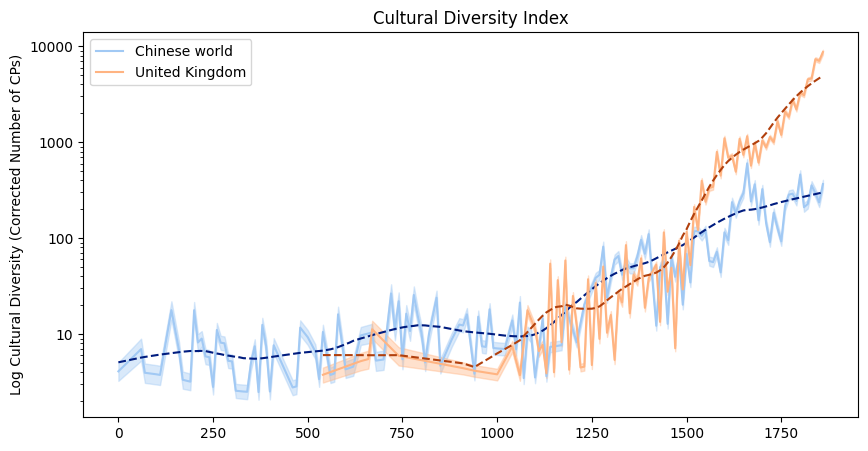

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from matplotlib.ticker import ScalarFormatter
data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)

regions = ['Chinese world', 'United Kingdom']
filtered_data = data[data['region_name'].isin(regions)]
filtered_data = filtered_data[filtered_data['decade'] >= 0]

fig, ax = plt.subplots(figsize=(10, 5))

# Define the number of colors you want
num_colors = 2

# Generate a list of light colors
light_colors = sns.color_palette("pastel", num_colors)

# Generate a list of dark colors
dark_colors = sns.color_palette("dark", num_colors)

for region, light_color, dark_color in zip(regions, light_colors, dark_colors):
    data_filtered = filtered_data[filtered_data['region_name'] == region]
    ax.plot(data_filtered['decade'], data_filtered['N_est'], label=region, color=light_color)
    ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color=light_color)

    # Add lowess smooth with more volatility
    lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.2)
    ax.plot(data_filtered['decade'], lowess[:, 1], color=dark_color, linestyle='--')

ax.set_title('Cultural Diversity Index')
ax.set_xlabel('')
ax.set_ylabel('Log Cultural Diversity (Corrected Number of CPs)')
ax.set_yscale('log')
ax.legend()

# Set the y-axis formatter to display full integers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()


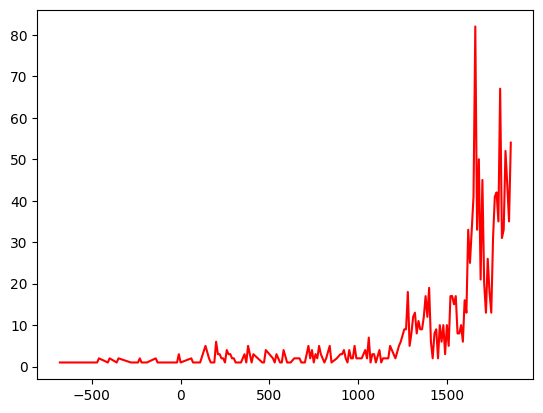

In [15]:
fig, ax = plt.subplots()
ax.plot(data_filtered['decade'], data_filtered['count_cps'], color='red')
plt.show()